In [1]:
%cd D:\updated\Chatty-V2

D:\updated\Chatty-V2


In [3]:
import pandas as pd
raw = pd.read_csv("DW_DATA//all-scripts.csv")

In [4]:
raw.head()

,idx,text,type,details,episodeid,doctorid
0,0,Sylvest home,location,NaN,21-7,6
1,1,Twin boys are playing a cross between chess an...,context,NaN,21-7,6
2,2,Where's mother?,talk,REMUS,21-7,6
3,3,She's busy.,talk,SYLVEST,21-7,6
4,4,Does that mean she isn't talking to us?,talk,ROMULUS,21-7,6


In [5]:
raw = raw[raw.type=='talk']
raw.head()

,idx,text,type,details,episodeid,doctorid
2,2,Where's mother?,talk,REMUS,21-7,6
3,3,She's busy.,talk,SYLVEST,21-7,6
4,4,Does that mean she isn't talking to us?,talk,ROMULUS,21-7,6
5,5,"No, she's just busy.",talk,SYLVEST,21-7,6
6,6,We would like to see her.,talk,BOTH,21-7,6


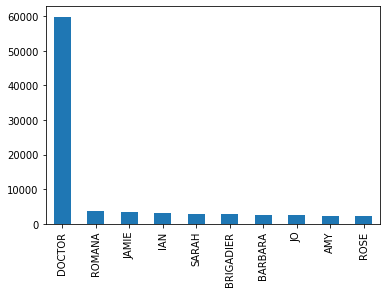

In [7]:
raw.details.value_counts()[:10].plot.bar()

In [8]:
raw.loc[raw['details'] != 'DOCTOR', 'details'] = 'COMPANION'

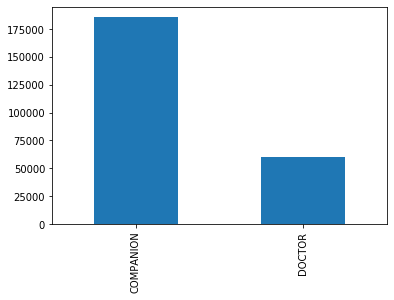

In [9]:
raw.details.value_counts()[:10].plot.bar()

In [10]:
raw["counts"] = raw["text"].str.split().str.len()

In [11]:
raw = raw.drop(["idx","doctorid"],axis=1)

In [12]:
raw = raw.reset_index(drop=True)

In [13]:
print(len(raw))
print("DOCTOR")
print("Max words per sentence: {}, Avg words per sentence: {}".format(max(raw[raw.details=='DOCTOR'].counts),raw[raw.details=='DOCTOR'].counts.mean()))
print("COMPANION")
print("Max words per sentence: {}, Avg words per sentence: {}".format(max(raw[raw.details=='COMPANION'].counts),raw[raw.details=='COMPANION'].counts.mean()))

245632
DOCTOR
Max words per sentence: 237.0, Avg words per sentence: 10.523773698465241
COMPANION
Max words per sentence: 184.0, Avg words per sentence: 8.82458935222062


We need to make it so that it's only the doctor talking to the companion, no companion to companion.<br>
Note that companion is x, doctor is y<br>
We first split by episode, then we check whether doctor talks under a companion, if not, line is removed

In [14]:
eps = raw.episodeid.unique()
len(eps)

305

In [19]:
df = raw
df["Person"] = df["details"]
df["Text"] = df["text"]
df["Ep"] = df["episodeid"]

I noticed that the number is way below the supposed 851, so I am gonna web scrap this

In [24]:
from tqdm import tqdm
import string
sep_eps = []
remove_these = []
X = []
Y = []
def sift(line):
    index = line.name
    if (line["Person"] == "COMPANION" and line["shift_Person"] == "DOCTOR"):
        x = str(line["Text"]).lower()
        x = x.translate(str.maketrans('', '', string.punctuation)).strip()
        y = str(line["shift_Text"]).lower()
        y = y.translate(str.maketrans('', '', string.punctuation)).strip()
        X.append(x)
        Y.append(y)
    else:
        remove_these.append(index)
for i in tqdm(range(len(eps))):
    ep_df = df[df["Ep"]==eps[i]]
    ep_df["shift_Person"] = df['Person'].shift(-1)
    ep_df["shift_Text"] = df['Text'].shift(-1)
    ep_df.apply(sift, axis=1)
    ep_df = ep_df.drop(remove_these)
    remove_these = []
    sep_eps.append(ep_df)
print(len(X))
print(len(Y))

  0%|                                                                                          | 0/305 [00:00<?, ?it/s]C:\Users\aldec\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aldec\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
100%|████████████████████████████████████████████████████████████████████████████████| 305/305 [00:45<00:00,  6.56it/s]


54825
54825


In [25]:
for i in range(20,30):
    print(X[i])
    print(Y[i])

and wheres that
youll soon find out its a marvellous place for a holidayand you and i both need a rest i would have taken you to the eye oforion but er the coordinates elude me at the moment peri
yes
how did you come by a name like that
its the diminutive of my proper name perpugilliam
indeed  onemorn a peri at the gate of eden stood disconsolate whowrote that
i havent the faintest idea
of course you dont you dont even know what a peripronounced peeri is do you peri
no
ill tell you a peri is a good and beautiful fairy in persianmythology the interesting thing is before it became good it wasevil and thats what you are thoroughly evil
doctor stop it
no no not even a fairy an alien spy sent here to spy on mewell we all know the fate of alien spies
right
what happened
you had another of your fits
i dont have fits
whatever you call them
i told you manic moments of no consequence they become lessdramatic and less and less frequent
well this was worse longer it was horrible
dont exaggerate


In [27]:
X2 = pd.read_csv("DW_DATA//X_1.csv")
Y2 = pd.read_csv("DW_DATA//Y_1.csv")
X2.head()

,Unnamed: 0,0
0,0,excuse me
1,1,were looking for a young girl
2,2,good evening
3,3,one of our pupils susan foreman came into this...
4,4,yes we saw her from across the street


In [29]:
import numpy as np
X2 = np.array(X2["0"]).tolist()
Y2 = np.array(Y2["0"]).tolist()

In [33]:
d1 = list(zip(X,Y))
d2 = list(zip(X2,Y2))

In [47]:
print("{},{}".format(len(X),len(X2)))

54825,46904


In [48]:
ultimate = list(set(d1+d2))
len(ultimate)

76543

In [49]:
ultimate = np.array(ultimate)

In [51]:
test = pd.DataFrame(ultimate)
test.columns = ["X","Y"]
test.head()

,X,Y
0,im pleased you two are so impressed i find the...,yes i suppose the atmosphere is rather rancid
1,hes let us go,he needs to move his tardis into the circle of...
2,without special treatment it would have spread...,ah thats nice
3,when i came back with these satellite reports ...,nothings been moved
4,there it is but he could be anywhere,fair exchange is no robbery the masters tempor...


In [54]:
test.to_csv("D://updated//Chatty-V2//DW_DATA//dwdata_1.csv")